# <center>Aquifer Test Analysis for Okawville #4

## <center>Part I: Background Information About Okawville

In late 1980s the Village of Okawville, Illinois experienced a large increase in the concentrations of chloride, hardness, and sulfate in supply well `#4`, one of two principal supply wells for the community. A subsequent investigation found that the aquifer was contaminated by brines spilled at the surface from oil drilling operations.  A resistivity survey was conducted by the Illinois State Geological Survey to determine the extent of the brine contamination.  The village wells are constructed in an alluvial sand aquifer that occupies the flood plain of modern Kaskaskia River valley. The existing wells are 500 feet from the valley wall which acts as a flow barrier.



In search of uncontaminated water, the Village drilled a test well two miles to the west at a new well site. The Illinois State Water Survey then conducted an aquifer test to determine aquifer properties. The results of this analysis are shown below.

## <center>Part I: Import Python Packages

This analysis was conducted using Python the following Python packages. Details of the packages are commented below.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import scipy.special as sps
%matplotlib inline

## <center>Part II: Import and plot the data

      dtw
0    0.00
1    0.02
2    0.04
3    0.07
4    0.08
5    0.10
6    0.13
7    0.16
8    0.19
9    0.22
10   0.24
12   0.27
15   0.30
20   0.37
25   0.43
30   0.46
40   0.51
50   0.56
60   0.59
70   0.61
80   0.62
90   0.63
100  0.64
120  0.65


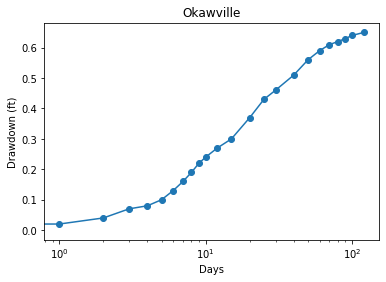

In [8]:
df_dd = pd.read_excel('https://github.com/yiquanw2/geol572_4/blob/master/Okawville_MW_AquiferTest.xlsx?raw=true', index_col=0)
print(df_dd)
plt.semilogx(df_dd,'-o')
plt.xlabel('Days')
plt.ylabel('Drawdown (ft)')
plt.title('Okawville')
plt.show()

## <center>Part III: Jacob Straight Line Method
    
Use the Jacob straight-line method to determine the transmissivity (T) and storativity (S) from the Okawville Aquifer Test.  The test well was pumped at a rate of 5.35 $ft^3/min$ (Q) and the drawdown was recorded in an observation well 30.0 feet (r) away from the test well.  In the Jacob equations below, $t_0$ is the x-intercept of the best-fit straight line through the data and $\Delta(h_0-h)$ is the drawdown over one log cycle of time on the best-fit line (use Python to calculate both $t_0$ and $\Delta(h_0-h)$).

![Jacob](https://share.cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/JacobStraightLine.PNG)

5     0.10
6     0.13
7     0.16
8     0.19
9     0.22
10    0.24
12    0.27
15    0.30
20    0.37
25    0.43
30    0.46
40    0.51
50    0.56
60    0.59
Name: dtw, dtype: float64
[-0.22616123  0.46112718]


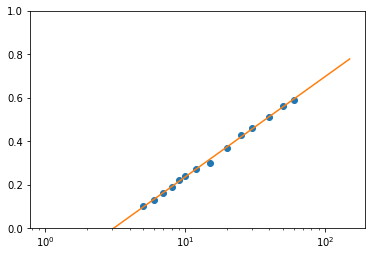

The Jacob Straight Line Method indicates that T is 3070.0 ft^2/day and S is 0.0165 .


In [20]:
dd=df_dd['dtw'][5:-5]
def log_line(x,a,b):
  return a+b*np.log10(x)

print(dd)
para, cova = spo.curve_fit(log_line, dd.index, dd, p0=(1, 1))
print(para)
xx=[value for value in range(1,151)]
yy=log_line(xx,para[0],para[1])
plt.semilogx(dd,'o',xx,yy)
plt.ylim(0,1)
plt.show()

#T=3070 ft^2/d S=0.0165
a = para[0]
b = para[1]
xint = 10**(-a/b)

T = 2.3*5.35/(4*3.14*(0.46))
S = 2.25*T*3.1/30/30
print('The Jacob Straight Line Method indicates that T is',round(T*60*24,-1),'ft^2/day and S is',round(S,4),'.')